# RoadSafe Analytics: Road Accidents- Exploratory Data Analysis(EDA)

### Project Objective: To perform a in-depth Exploratory Data Analysis(EDA) of a large dataset of Accidents happened in US from 2016-2023 and draw meaningful insights from it like which factors have affected mostly to the likelihood of accidents in recent years and providing solutions to overcome accidents and so on.

### Expected Outcomes:-
### 1. Gain the ability to clean, preprocess, and understand real-world accident data effectively.

### 2. Explore accident patterns based on time, weather, road conditions, and severity using visual analysis.
 
### 3. Identify correlations, hotspots, and key risk factors through univariate, bivariate, and geospatial analysis.

### 4. Present meaningful insights with clear visualizations, documentation, and a final project presentation.

### Step 1: Setup - Importing Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew

sns.set_style('whitegrid')

### Step 2: Data Loading and Initial Inspection

In [4]:
roadsafe_df = pd.read_csv(r"F:\Roadsafe Analytics Project\us-accidents.csv", nrows=2000000)
roadsafe_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [12]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 46 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Source                 object 
 2   Severity               int64  
 3   Start_Time             object 
 4   End_Time               object 
 5   Start_Lat              float64
 6   Start_Lng              float64
 7   End_Lat                float64
 8   End_Lng                float64
 9   Distance(mi)           float64
 10  Description            object 
 11  Street                 object 
 12  City                   object 
 13  County                 object 
 14  State                  object 
 15  Zipcode                object 
 16  Country                object 
 17  Timezone               object 
 18  Airport_Code           object 
 19  Weather_Timestamp      object 
 20  Temperature(F)         float64
 21  Wind_Chill(F)          float64
 22  Humidity(%)       

In [13]:
roadsafe_df.isnull().sum()

ID                             0
Source                         0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                  2000000
End_Lng                  2000000
Distance(mi)                   0
Description                    4
Street                      1712
City                          47
County                         0
State                          0
Zipcode                      308
Country                        0
Timezone                    1453
Airport_Code                3705
Weather_Timestamp          23097
Temperature(F)             32958
Wind_Chill(F)             485289
Humidity(%)                35687
Pressure(in)               27131
Visibility(mi)             36852
Wind_Direction             35526
Wind_Speed(mph)           122331
Precipitation(in)         515863
Weather_Condition          35669
Amenity                        0
Bump      

In [14]:
print("Descriptive statistics:-")
roadsafe_df.describe()

Descriptive statistics:-


,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.000000e+06,2.000000e+06,2.000000e+06,0.0,0.0,2.000000e+06,1.967042e+06,1.514711e+06,1.964313e+06,1.972869e+06,1.963148e+06,1.877669e+06,1.484137e+06
mean,2.318935e+00,3.605844e+01,-9.364373e+01,NaN,NaN,2.166527e-01,6.299356e+01,5.986587e+01,6.616150e+01,2.951607e+01,9.102687e+00,7.429139e+00,8.788663e-03
std,5.177706e-01,4.842643e+00,1.661899e+01,NaN,NaN,1.653574e+00,1.810324e+01,2.107553e+01,2.229775e+01,9.462990e-01,2.476175e+00,5.373457e+00,1.277031e-01
min,1.000000e+00,2.455480e+01,-1.244974e+02,NaN,NaN,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,1.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.305089e+01,-1.118921e+02,NaN,NaN,0.000000e+00,5.100000e+01,4.500000e+01,5.000000e+01,2.930000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.531118e+01,-8.744418e+01,NaN,NaN,0.000000e+00,6.500000e+01,6.300000e+01,6.900000e+01,2.980000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,3.000000e+00,4.002456e+01,-8.085263e+01,NaN,NaN,0.000000e+00,7.700000e+01,7.600000e+01,8.500000e+01,3.000000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900220e+01,-6.755331e+01,NaN,NaN,4.417500e+02,2.030000e+02,1.960000e+02,1.000000e+02,5.832000e+01,1.110000e+02,8.228000e+02,3.647000e+01


In [6]:
roadsafe_df['Street'].value_counts()

Street
I-5 N              3503
I-10 E             2703
US-101 N           2684
I-405 N            2576
San Diego Fwy S    2412
                   ... 
Western Way           1
NW 31st St            1
Dalbora Rd            1
Lockmiller Rd         1
Leominster Rd         1
Name: count, Length: 22102, dtype: int64

In [7]:
roadsafe_df['Start_Time']

0         2016-02-08 05:46:00
1         2016-02-08 06:07:59
2         2016-02-08 06:49:27
3         2016-02-08 07:23:34
4         2016-02-08 07:39:07
                 ...         
199995    2017-01-12 06:12:42
199996    2017-01-12 06:15:23
199997    2017-01-12 06:12:02
199998    2017-01-12 06:09:29
199999    2017-01-12 06:08:14
Name: Start_Time, Length: 200000, dtype: object

### Step 3: Data Cleaning and Preprocessing

In [5]:
# Dropping columns with excessive null values
cols = ['End_Lat','End_Lng']

roadsafe_df.drop(cols,axis=1,inplace=True)

In [9]:
print("Dataset after removing irrelevant columns:-")
roadsafe_df.head()

Dataset after removing irrelevant columns:-


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,False,False,False,False,True,False,Day,Day,Day,Day


In [10]:
roadsafe_df.describe()

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,500000.000000,500000.000000,500000.000000,500000.000000,492750.000000,62359.000000,492085.000000,494261.000000,489461.000000,410960.000000,51946.000000
mean,2.374690,35.929426,-97.590381,0.065294,64.668092,30.422478,64.529433,30.004807,9.227911,8.913004,0.068995
std,0.486796,5.032482,18.280944,0.782881,16.877594,15.796170,21.387837,0.242343,2.140192,5.414922,0.562091
min,1.000000,25.433098,-123.813927,0.000000,-77.800000,-29.300000,4.000000,0.120000,0.000000,0.000000,0.000000
25%,2.000000,32.811352,-118.096634,0.000000,55.000000,21.900000,49.000000,29.900000,10.000000,5.800000,0.000000
50%,2.000000,34.247250,-95.543968,0.010000,66.200000,31.000000,66.000000,30.000000,10.000000,8.100000,0.010000
75%,3.000000,40.134354,-81.565750,0.010000,77.000000,38.100000,82.000000,30.110000,10.000000,11.500000,0.040000
max,4.000000,48.199970,-70.571518,90.370003,161.600000,111.000000,100.000000,33.040000,111.000000,822.800000,10.140000


In [16]:
roadsafe_df.isna().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   4
Street                     1712
City                         47
County                        0
State                         0
Zipcode                     308
Country                       0
Timezone                   1453
Airport_Code               3705
Weather_Timestamp         23097
Temperature(F)            32958
Wind_Chill(F)            485289
Humidity(%)               35687
Pressure(in)              27131
Visibility(mi)            36852
Wind_Direction            35526
Wind_Speed(mph)          122331
Precipitation(in)        515863
Weather_Condition         35669
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction

In [13]:
roadsafe_df['Wind_Chill(F)'].isnull().sum()

178610

In [14]:
roadsafe_df['Precipitation(in)'].isnull().sum()

181648

In [6]:
roadsafe_df.drop(columns=['Wind_Chill(F)','Precipitation(in)'],axis=1,inplace=True)

In [7]:
roadsafe_df['Start_Time'] = pd.to_datetime(roadsafe_df['Start_Time'], errors='coerce')
roadsafe_df['End_Time'] = pd.to_datetime(roadsafe_df['End_Time'], errors='coerce')
roadsafe_df['Weather_Timestamp'] = pd.to_datetime(roadsafe_df['Weather_Timestamp'], errors='coerce')

In [19]:
roadsafe_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 42 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   Distance(mi)           float64       
 8   Description            object        
 9   Street                 object        
 10  City                   object        
 11  County                 object        
 12  State                  object        
 13  Zipcode                object        
 14  Country                object        
 15  Timezone               object        
 16  Airport_Code           object        
 17  Weather_Timestamp      datetime64[ns]
 18  Temperature(F)        

In [20]:
roadsafe_df.isnull().sum()

ID                            0
Source                        0
Severity                      0
Start_Time                    0
End_Time                      0
Start_Lat                     0
Start_Lng                     0
Distance(mi)                  0
Description                   4
Street                     1712
City                         47
County                        0
State                         0
Zipcode                     308
Country                       0
Timezone                   1453
Airport_Code               3705
Weather_Timestamp         23097
Temperature(F)            32958
Humidity(%)               35687
Pressure(in)              27131
Visibility(mi)            36852
Wind_Direction            35526
Wind_Speed(mph)          122331
Weather_Condition         35669
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [17]:
roadsafe_df['Wind_Speed(mph)'].dtype

dtype('float64')

In [ ]:
roadsafe_df['Wind_Speed(mph)']

0        NaN
1        NaN
2        3.5
3        4.6
4        3.5
        ... 
49995    NaN
49996    4.6
49997    NaN
49998    NaN
49999    NaN
Name: Wind_Speed(mph), Length: 50000, dtype: float64

In [8]:
median_speed=roadsafe_df['Wind_Speed(mph)'].median()
roadsafe_df['Wind_Speed(mph)']=roadsafe_df['Wind_Speed(mph)'].fillna(median_speed)

In [9]:
roadsafe_df=roadsafe_df.dropna(subset=['Temperature(F)','Humidity(%)','Pressure(in)','Visibility(mi)','Wind_Direction','Weather_Condition'])

In [10]:
roadsafe_df=roadsafe_df.dropna(subset=['City'])

In [10]:
print("Missing values after cleaning the dataset:-")
roadsafe_df.isnull().sum()

Missing values after cleaning the dataset:-


ID                          0
Source                      0
Severity                    0
Start_Time                  0
End_Time                    0
Start_Lat                   0
Start_Lng                   0
Distance(mi)                0
Description                 3
Street                   1649
City                        0
County                      0
State                       0
Zipcode                     0
Country                     0
Timezone                    0
Airport_Code                0
Weather_Timestamp           0
Temperature(F)              0
Humidity(%)                 0
Pressure(in)                0
Visibility(mi)              0
Wind_Direction              0
Wind_Speed(mph)             0
Weather_Condition           0
Amenity                     0
Bump                        0
Crossing                    0
Give_Way                    0
Junction                    0
No_Exit                     0
Railway                     0
Roundabout                  0
Station   

In [25]:
roadsafe_df.describe(include="O")

,ID,Source,Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Wind_Direction,Weather_Condition,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
count,1940873,1940873,1940870,1939224,1940873,1940873,1940873,1940873,1940873,1940873,1940873,1940873,1940873,1939401,1939401,1939401,1939401
unique,1940873,2,1335400,121748,10034,1552,49,269938,1,4,1797,24,117,2,2,2,2
top,A-1,Source2,Accident on I-85 Southbound at Exit 54 Pelham Rd.,I-95 S,Houston,Los Angeles,CA,91706,US,US/Eastern,KMCJ,CALM,Fair,Day,Day,Day,Day
freq,1,1865233,217,18116,68203,129309,396139,2671,1940873,895827,40434,271135,667912,1406194,1512327,1617640,1699007


In [11]:
# Creating new columns

roadsafe_df['Hour']=roadsafe_df['Start_Time'].dt.hour
roadsafe_df['WeekDay']=roadsafe_df['Start_Time'].dt.day_name()
roadsafe_df['Month']=roadsafe_df['Start_Time'].dt.month_name()

In [26]:
boolean_cols = roadsafe_df.select_dtypes(include=['bool']).columns
print(boolean_cols)

Index(['Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
       'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
       'Traffic_Signal', 'Turning_Loop'],
      dtype='object')


In [12]:
bool_cols = [
    'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit',
    'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop'
]
roadsafe_df[bool_cols] = roadsafe_df[bool_cols].astype(int)

In [28]:
roadsafe_df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Distance(mi),Description,Street,...,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,WeekDay,Month
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,...,0,0,0,0,Night,Night,Night,Night,Monday,February
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,...,0,0,0,0,Night,Night,Night,Day,Monday,February
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,...,0,0,1,0,Night,Night,Day,Day,Monday,February
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,...,0,0,0,0,Night,Day,Day,Day,Monday,February
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,...,0,0,1,0,Day,Day,Day,Day,Monday,February


In [29]:
roadsafe_df[['Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']].nunique()

Sunrise_Sunset           2
Civil_Twilight           2
Nautical_Twilight        2
Astronomical_Twilight    2
dtype: int64

In [13]:
roadsafe_df['TimeOfDay'] = roadsafe_df['Sunrise_Sunset'].map({
    'Day': 'Day',
    'Night': 'Night'
})

In [14]:
roadsafe_df.drop(
    ['Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight'],
    axis=1,
    inplace=True
)

In [15]:
# Removing irrelevant columns

cols_to_drop = [
    'ID', 'Description', 'Street', 'Zipcode', 'Country',
    'Airport_Code', 'Source', 'Turning_Loop', 'Timezone']

roadsafe_df.drop(columns=cols_to_drop, inplace=True)

In [17]:
# Detecting Outliers

numeric_cols = roadsafe_df.select_dtypes(include=['int64','float64']).columns

def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers.index.tolist()
    
all_outliers = {}
for col in numeric_cols:
    outlier_indices = detect_outliers_iqr(roadsafe_df, col)
    all_outliers[col] = outlier_indices
    print(f"{col}: {len(outlier_indices)} outliers ({len(outlier_indices)/len(roadsafe_df)*100:.4f}%)")

outlier_rows = roadsafe_df.loc[sorted(set(idx for indices in all_outliers.values() for idx in indices))]
print(f"\nTotal unique rows with outliers: {len(outlier_rows)}")

Severity: 0 outliers (0.0000%)
Start_Lat: 0 outliers (0.0000%)
Start_Lng: 0 outliers (0.0000%)
Distance(mi): 391599 outliers (20.1764%)
Temperature(F): 8984 outliers (0.4629%)
Humidity(%): 0 outliers (0.0000%)
Pressure(in): 81175 outliers (4.1824%)
Visibility(mi): 378674 outliers (19.5105%)
Wind_Speed(mph): 52777 outliers (2.7192%)

Total unique rows with outliers: 780289


In [18]:
# Handling outliers

cols_to_cap = ['Start_Lat', 'Distance(mi)', 'Temperature(F)','Pressure(in)','Visibility(mi)','Wind_Speed(mph)']

for col in cols_to_cap:
    lower = roadsafe_df[col].quantile(0.01)
    upper = roadsafe_df[col].quantile(0.99)
    roadsafe_df[col] = roadsafe_df[col].clip(lower=lower, upper=upper)

for col in cols_to_cap:
    print(f"{col}: min={roadsafe_df[col].min()}, max={roadsafe_df[col].max()}")

Start_Lat: min=25.889278, max=47.57275224
Distance(mi): min=0.0, max=5.590000152587892
Temperature(F): min=18.0, max=96.0
Pressure(in): min=24.52, max=30.41
Visibility(mi): min=0.75, max=10.0
Wind_Speed(mph): min=0.0, max=22.0


### Step 3: Univariate Analysis 

Text(0.5, 1.0, 'Week Day Distribution')

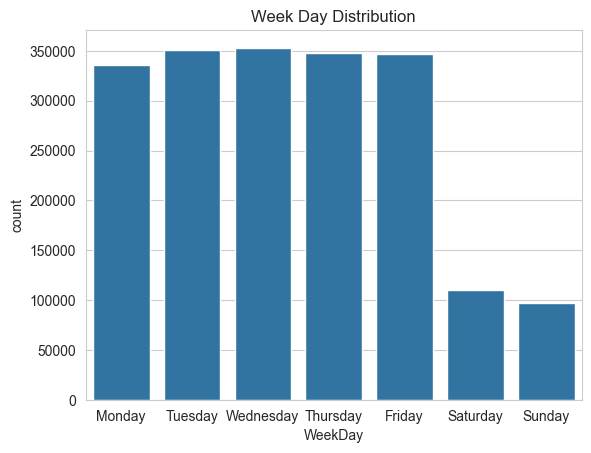

In [35]:
sns.countplot(x='WeekDay',data=roadsafe_df).set_title('Week Day Distribution') 

### Key Insights:-
#### Most of the accidents happened on Tuesday,Wednesday,Thursday and Friday.

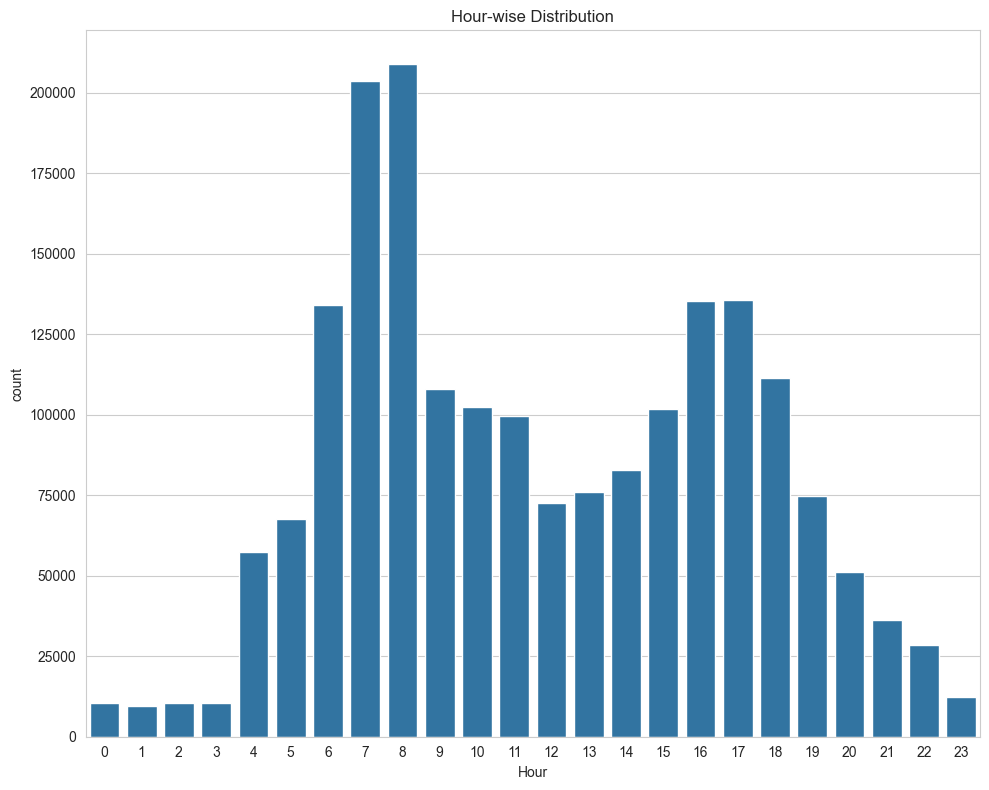

In [37]:
plt.figure(figsize=(10,8))
sns.countplot(x='Hour',data=roadsafe_df)
plt.title('Hour-wise Distribution')
plt.tight_layout()
plt.show()

### Most of the accidents happened between 7 to 8 in the morning

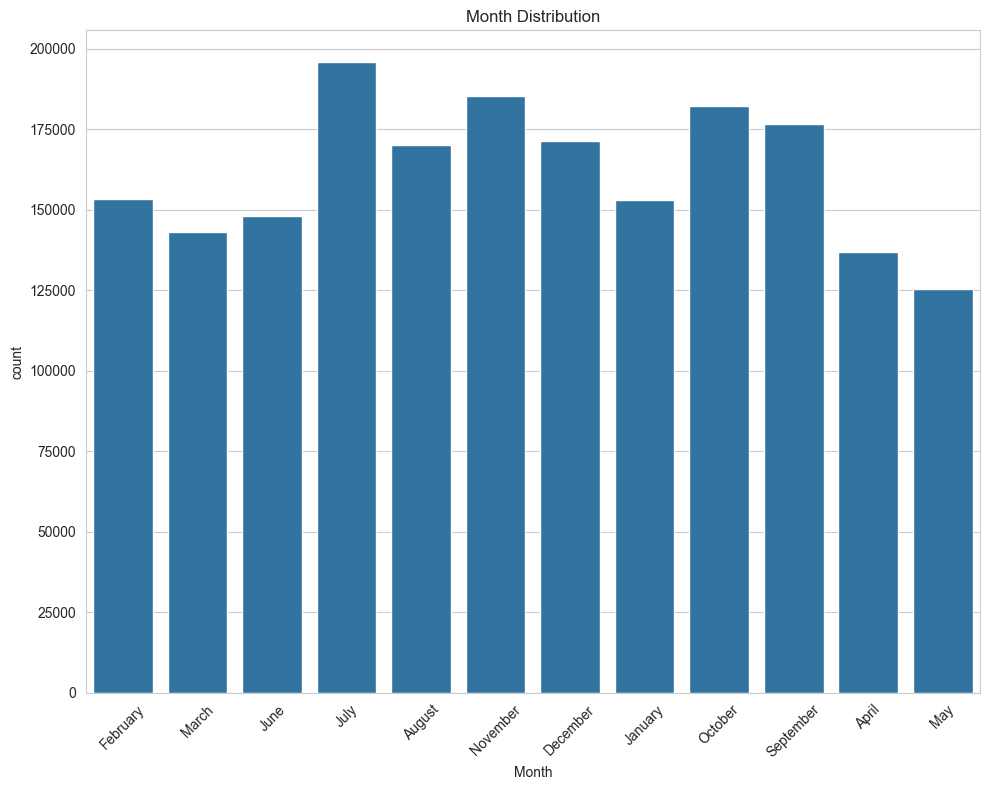

In [38]:
plt.figure(figsize=(10,8))
sns.countplot(x='Month',data=roadsafe_df)
plt.title('Month Distribution')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Key Insights:-
#### Accidents in US have occured the most in the month of July.

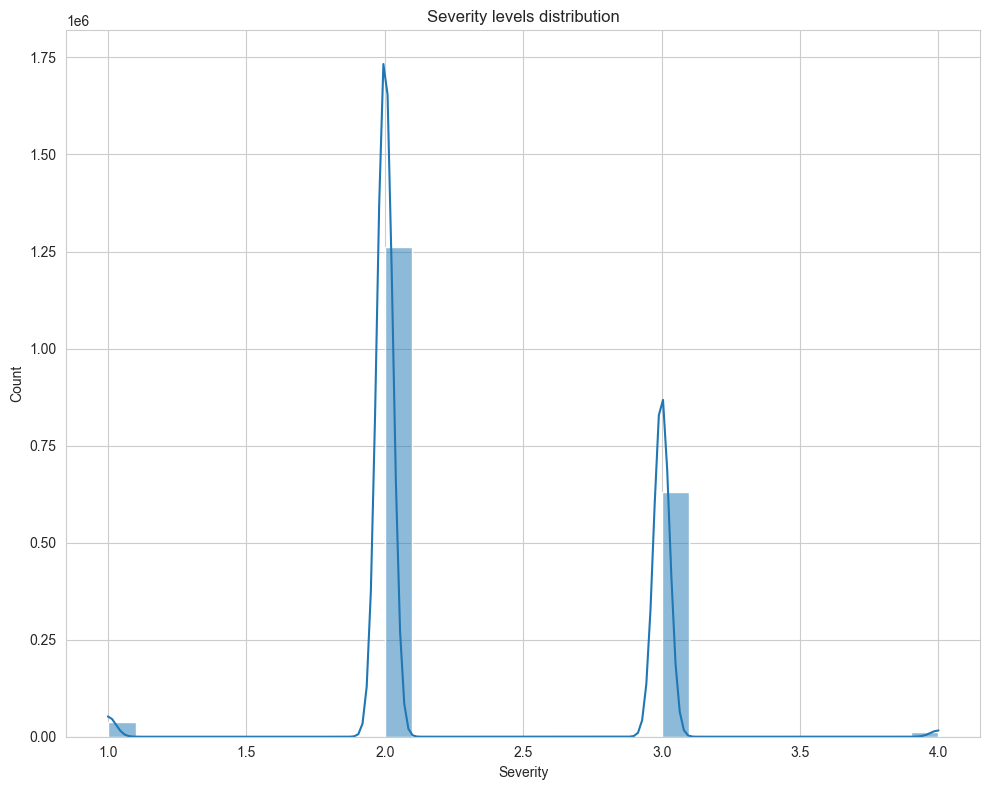

In [39]:
plt.figure(figsize=(10,8))
sns.histplot(x='Severity',data=roadsafe_df,bins=30,kde=True)
plt.title('Severity levels distribution')
plt.tight_layout()
plt.show()

### Key Insights:-
#### The severity distribution peaks at levels 2 and 3, indicating that most accidents in the dataset are of moderate to moderately high severity, while extremely severe accidents (level 4) are relatively rare.

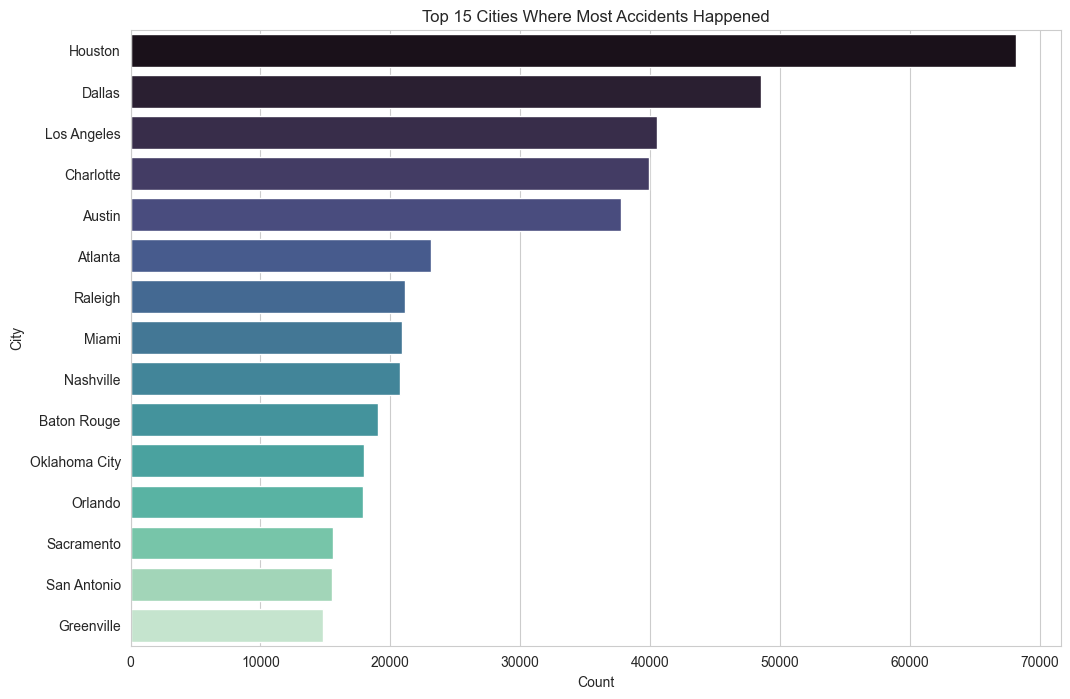

In [40]:
# Get the top 15 cities and their counts
top_cities_counts = roadsafe_df['City'].value_counts().reset_index()
top_cities_counts.columns = ['City', 'count'] # Rename columns for clarity

# Select only the top 15 for plotting
top_cities_counts_plot = top_cities_counts.head(15)

plt.figure(figsize=(12, 8))
sns.barplot(y='City', x='count', data=top_cities_counts_plot, palette='mako', hue='City', legend=False)
plt.title('Top 15 Cities Where Most Accidents Happened')
plt.xlabel('Count')
plt.ylabel('City')
plt.show()

### Key Insights:-

#### Most accidents happened in Houston.

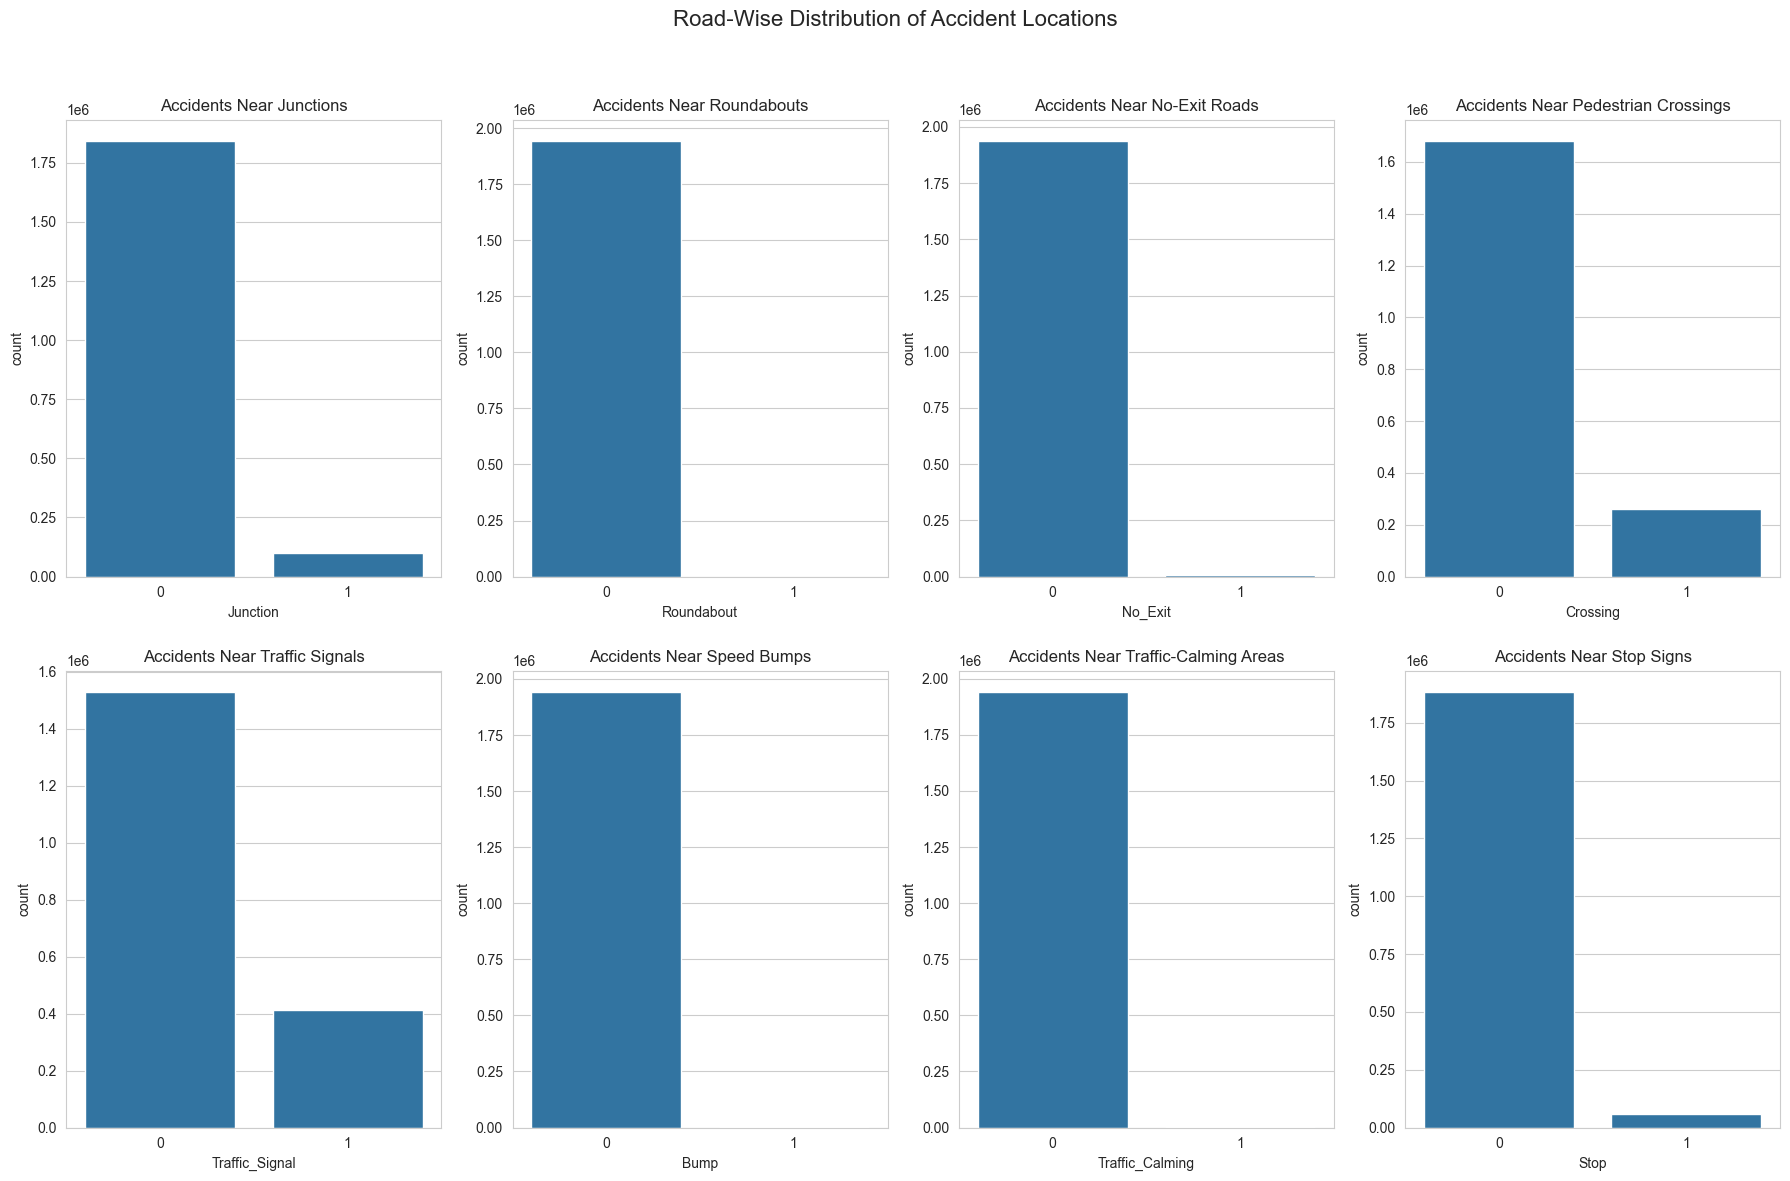

In [42]:
fig, axes = plt.subplots(2, 4, figsize=(18, 12))
fig.suptitle('Road-Wise Distribution of Accident Locations', fontsize=16)

# Row 1
sns.countplot(ax=axes[0, 0], x='Junction', data=roadsafe_df).set_title('Accidents Near Junctions')
sns.countplot(ax=axes[0, 1], x='Roundabout', data=roadsafe_df).set_title('Accidents Near Roundabouts')
sns.countplot(ax=axes[0, 2], x='No_Exit', data=roadsafe_df).set_title('Accidents Near No-Exit Roads')
sns.countplot(ax=axes[0, 3], x='Crossing', data=roadsafe_df).set_title('Accidents Near Pedestrian Crossings')

# Row 2
sns.countplot(ax=axes[1, 0], x='Traffic_Signal', data=roadsafe_df).set_title('Accidents Near Traffic Signals')
sns.countplot(ax=axes[1, 1], x='Bump', data=roadsafe_df).set_title('Accidents Near Speed Bumps')
sns.countplot(ax=axes[1, 2], x='Traffic_Calming', data=roadsafe_df).set_title('Accidents Near Traffic-Calming Areas')
sns.countplot(ax=axes[1, 3], x='Stop', data=roadsafe_df).set_title('Accidents Near Stop Signs')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Key Insights:-

#### 1. No accidents were recorded near Roundabout, No Exit, Bump, and Traffic Calming road types.
#### 2. Most accidents occurred near Junctions, Crossings, Traffic Signals, and Stop road types.

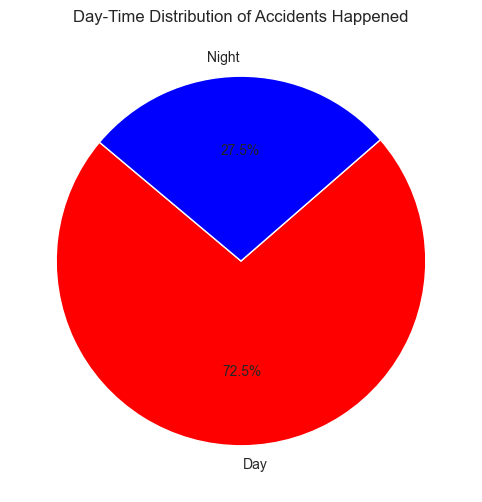

In [41]:
plt.figure(figsize=(8, 6))
daytime_counts = roadsafe_df['TimeOfDay'].value_counts()
plt.pie(daytime_counts, labels=daytime_counts.index, autopct='%1.1f%%', startangle=140, colors=['red', 'blue'])
plt.title('Day-Time Distribution of Accidents Happened')
plt.ylabel('')
plt.show()

### Key Insights:-
#### Accidents happened mostly in daytime.

### Step-4:Bivariate Analysis

Bivariate Analysis: Feature vs. Severity


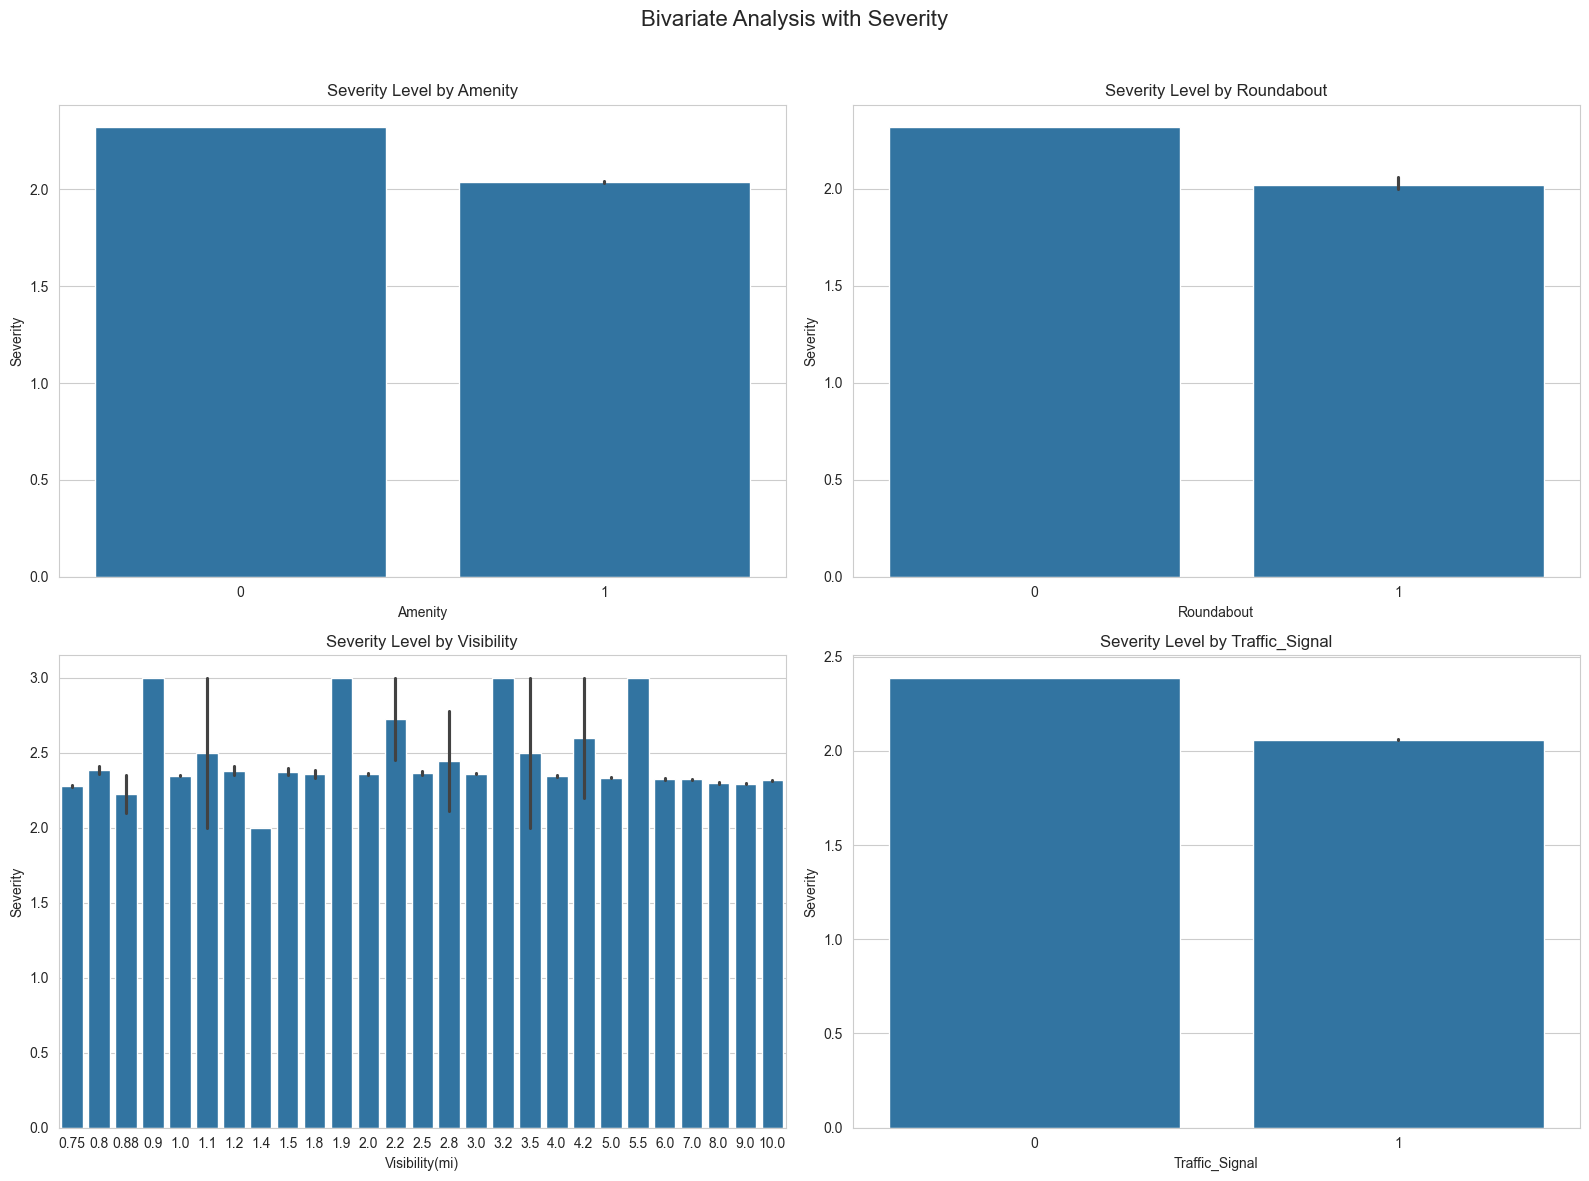

In [43]:
print("Bivariate Analysis: Feature vs. Severity")

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Bivariate Analysis with Severity', fontsize=16)

sns.barplot(ax=axes[0, 0], x='Amenity', y='Severity', data=roadsafe_df).set_title('Severity Level by Amenity')

sns.barplot(ax=axes[0, 1], x='Roundabout', y='Severity', data=roadsafe_df).set_title('Severity Level by Roundabout')

sns.barplot(ax=axes[1, 0], x='Visibility(mi)', y='Severity', data=roadsafe_df).set_title('Severity Level by Visibility')

sns.barplot(ax=axes[1, 1], x='Traffic_Signal', y='Severity', data=roadsafe_df).set_title('Severity Level by Traffic_Signal')

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

### Key Insights:-

#### 1. Amenity and Roundabout: When there is an amenity or a roundabout, the severity level is around 2.
#### 2. Visibility(mi): The severity level is highest when the visibility is 0.9,1.9,3.2 or 5.5.
#### 3. Traffic_Signal: When there is a traffic signal present in an area, the severity of accident is moderate.

In [19]:
roadsafe_df.drop('Sunrise_Sunset',axis=1,inplace=True)

In [20]:
roadsafe_df.drop('Weather_Timestamp',axis=1,inplace=True)

In [46]:
roadsafe_df.describe(include="O")

,City,County,State,Wind_Direction,Weather_Condition,WeekDay,Month,TimeOfDay
count,1940873,1940873,1940873,1940873,1940873,1940873,1940873,1939401
unique,10034,1552,49,24,117,7,12,2
top,Houston,Los Angeles,CA,CALM,Fair,Wednesday,July,Day
freq,68203,129309,396139,271135,667912,353126,195900,1406194


<Axes: xlabel='Severity', ylabel='Distance(mi)'>

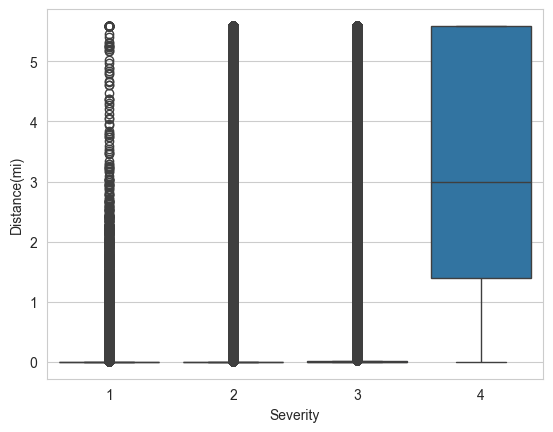

In [47]:
sns.boxplot(x='Severity', y='Distance(mi)', data=roadsafe_df)

<Axes: xlabel='Severity', ylabel='Temperature(F)'>

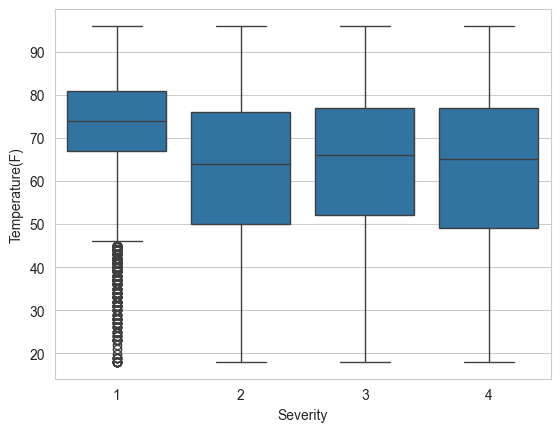

In [48]:
sns.boxplot(x='Severity', y='Temperature(F)', data=roadsafe_df)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Light Rain'),
  Text(1, 0, 'Overcast'),
  Text(2, 0, 'Mostly Cloudy'),
  Text(3, 0, 'Light Snow'),
  Text(4, 0, 'Scattered Clouds'),
  Text(5, 0, 'Partly Cloudy'),
  Text(6, 0, 'Clear'),
  Text(7, 0, 'Fog'),
  Text(8, 0, 'Cloudy'),
  Text(9, 0, 'Fair')])

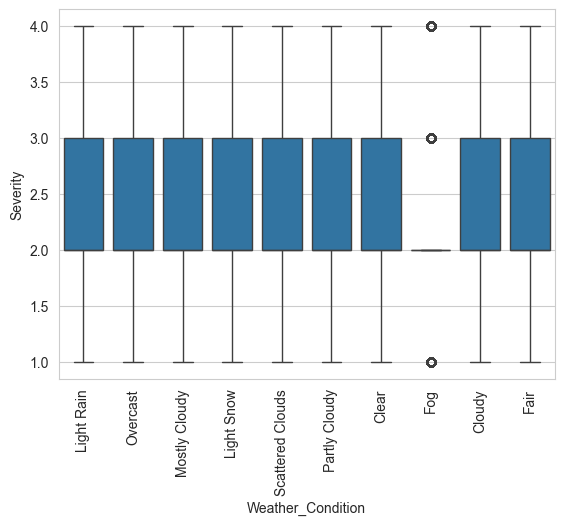

In [49]:
top_weather = roadsafe_df['Weather_Condition'].value_counts().index[:10]
sns.boxplot(x='Weather_Condition', y='Severity', data=roadsafe_df[roadsafe_df['Weather_Condition'].isin(top_weather)])
plt.xticks(rotation=90)

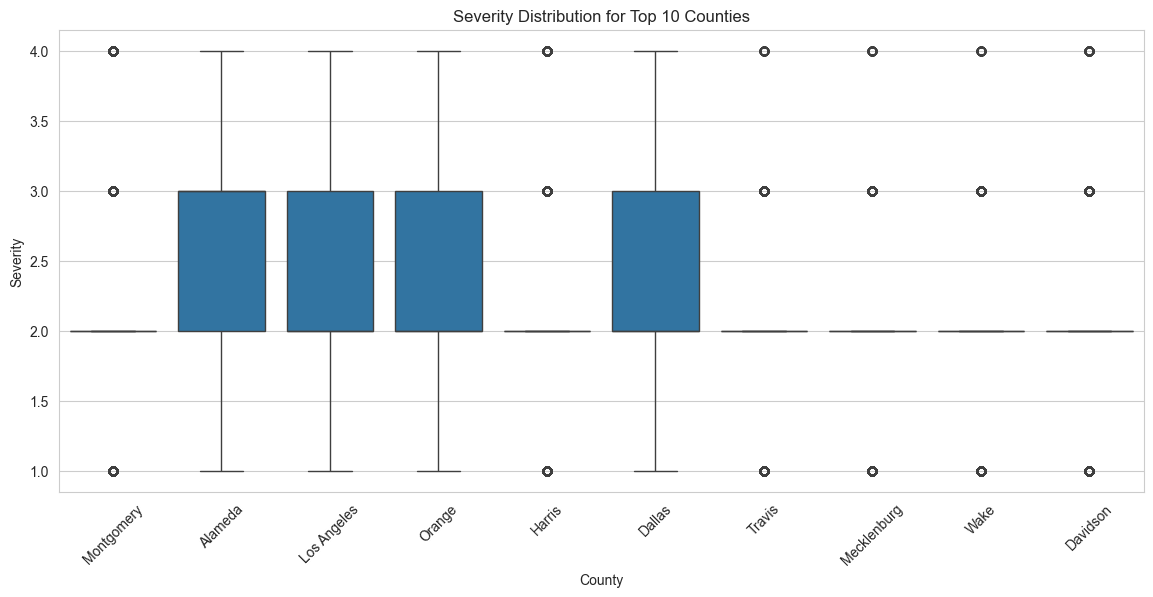

In [50]:
top10_counties = roadsafe_df['County'].value_counts().head(10).index
df_top10 = roadsafe_df[roadsafe_df['County'].isin(top10_counties)]
plt.figure(figsize=(14,6))
sns.boxplot(x='County', y='Severity', data=df_top10)
plt.title("Severity Distribution for Top 10 Counties")
plt.xticks(rotation=45)
plt.show()

### Step-5 : Multivariate Analysis

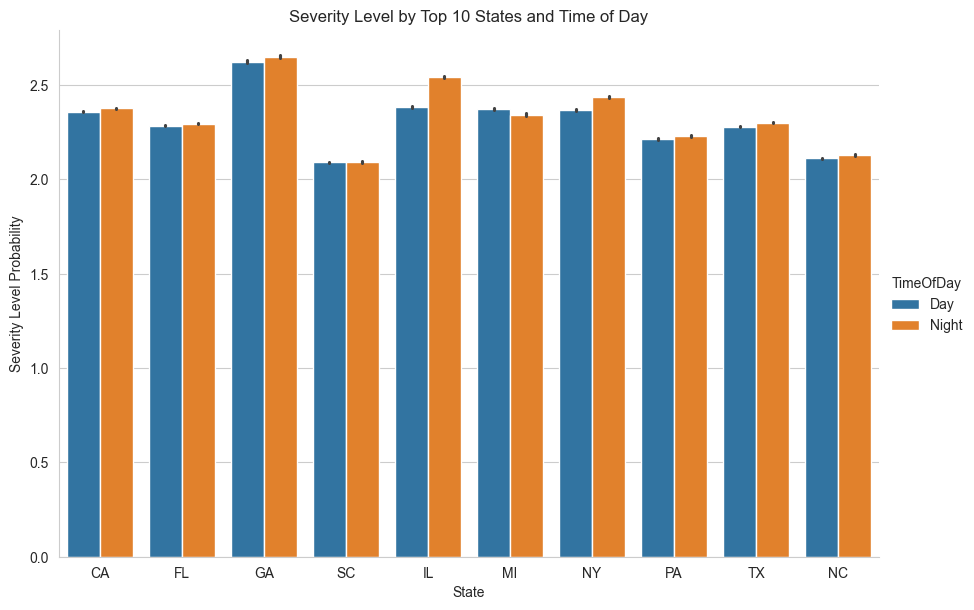

In [54]:
# Select top 10 states by accident count
top_10_states = roadsafe_df['State'].value_counts().nlargest(10).index
filtered_df = roadsafe_df[roadsafe_df['State'].isin(top_10_states)]

sns.catplot(x='State', y='Severity', hue='TimeOfDay',
            data=filtered_df, kind='bar',
            height=6, aspect=1.5)

plt.title('Severity Level by Top 10 States and Time of Day')
plt.ylabel('Severity Level Probability')
plt.show()

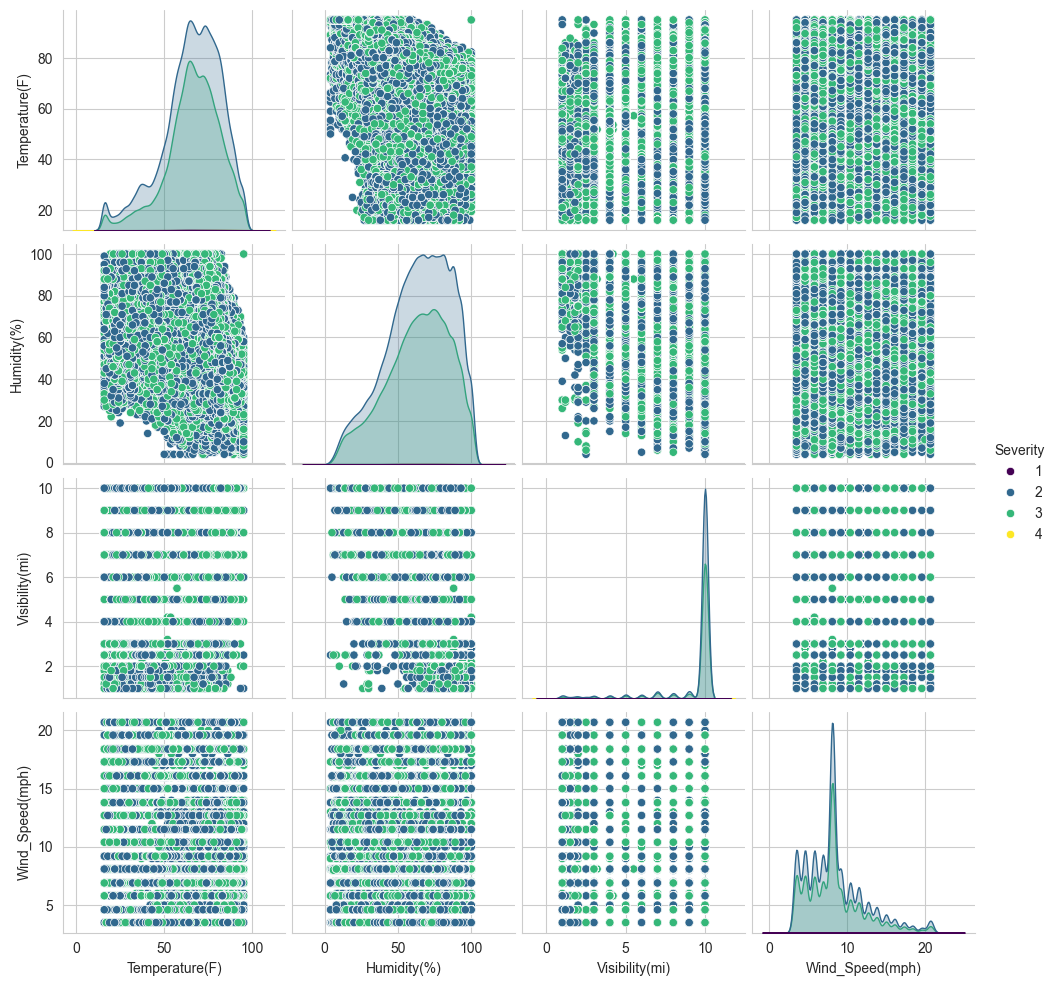

In [56]:
sns.pairplot(
    roadsafe_df[['Severity', 'Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 'Wind_Speed(mph)']],
    hue='Severity',
    palette='viridis',
    diag_kind='kde'
)
plt.show()

### Correlation Analysis

In [55]:
corrmat = roadsafe_df.corr(numeric_only=True)
corrmat

,Severity,Start_Lat,Start_Lng,Distance(mi),Temperature(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Amenity,...,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Hour
Severity,1.000000,0.051501,-0.029366,0.186279,-0.006145,-0.047894,0.005640,-0.012328,0.065001,-0.062860,...,-0.025993,0.100714,-0.019678,-0.023073,-0.002857,-0.075958,-0.100251,-0.003716,-0.258831,0.130611
Start_Lat,0.051501,1.000000,0.026514,0.069992,-0.401177,-0.007759,-0.157836,-0.069672,0.055475,0.052983,...,-0.005965,0.047080,0.008112,0.005254,0.002035,0.028596,0.012894,0.006145,-0.081345,0.006274
Start_Lng,-0.029366,0.026514,1.000000,0.062563,-0.060970,0.191199,0.141044,-0.033476,0.053940,0.001738,...,0.022430,-0.076573,0.002093,-0.022942,-0.002005,-0.019280,-0.035200,-0.001895,0.076212,-0.034306
Distance(mi),0.186279,0.069992,0.062563,1.000000,-0.042469,0.019321,-0.065920,-0.019099,0.003207,-0.019567,...,-0.006203,0.007497,-0.006453,-0.013917,-0.001022,-0.028522,-0.022367,-0.003133,-0.083169,0.000274
Temperature(F),-0.006145,-0.401177,-0.060970,-0.042469,1.000000,-0.303921,0.069713,0.212575,0.037748,-0.009490,...,0.004158,-0.011575,0.000026,0.000615,-0.001177,-0.003829,-0.005235,-0.000215,0.039704,0.217698
Humidity(%),-0.047894,-0.007759,0.191199,0.019321,-0.303921,1.000000,0.158565,-0.410487,-0.203355,-0.003242,...,0.001562,-0.012601,-0.009011,-0.001144,0.000776,-0.000738,-0.012402,-0.003917,-0.011696,-0.346998
Pressure(in),0.005640,-0.157836,0.141044,-0.065920,0.069713,0.158565,1.000000,0.021445,-0.018479,0.017448,...,0.004646,0.040524,-0.019838,0.010926,-0.000624,0.027062,-0.013665,-0.002085,-0.009783,0.014644
Visibility(mi),-0.012328,-0.069672,-0.033476,-0.019099,0.212575,-0.410487,0.021445,1.000000,0.037490,0.007778,...,0.001241,-0.002184,0.003841,0.004160,0.000708,0.010238,0.003611,0.003219,0.031306,0.124348
Wind_Speed(mph),0.065001,0.055475,0.053940,0.003207,0.037748,-0.203355,-0.018479,0.037490,1.000000,0.004729,...,0.002671,0.008815,0.001256,-0.001708,0.000483,0.007652,0.000593,-0.000858,0.021382,0.177770
Amenity,-0.062860,0.052983,0.001738,-0.019567,-0.009490,-0.003242,0.017448,0.007778,0.004729,1.000000,...,0.005112,-0.021489,0.013882,0.052172,0.000327,0.171474,0.036705,0.043285,0.105388,-0.001212


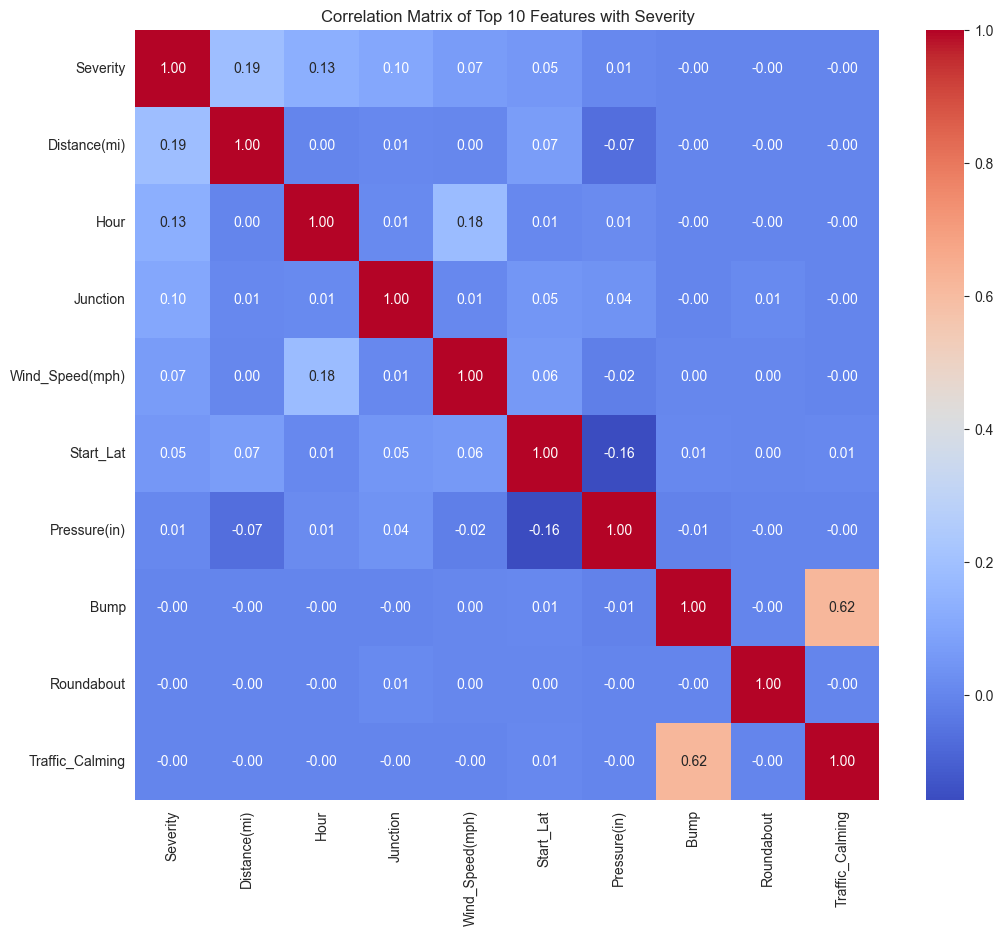

In [56]:
top_corr_features = corrmat.nlargest(10, 'Severity')['Severity'].index
top_corr_matrix = roadsafe_df[top_corr_features].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(top_corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Top 10 Features with Severity')
plt.show()

## Step-6: Geospatial Analysis

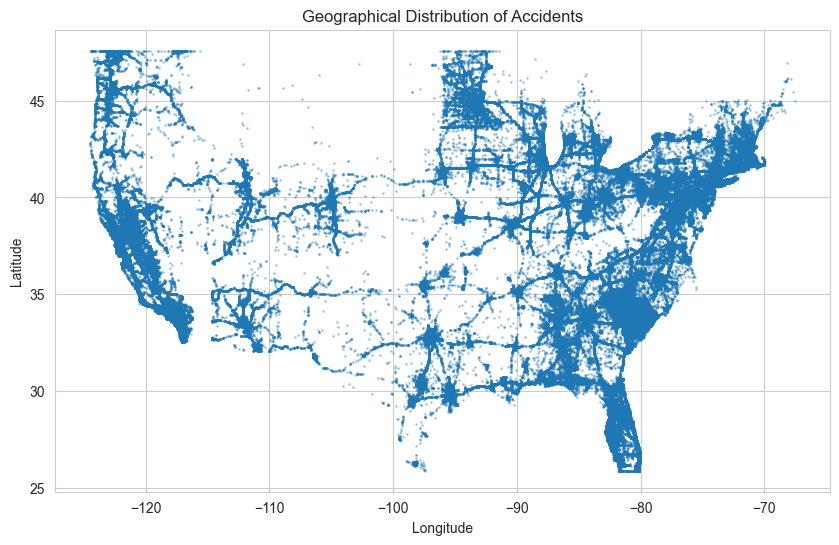

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(
    roadsafe_df['Start_Lng'],
    roadsafe_df['Start_Lat'],
    s=1,
    alpha=0.3
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Accidents')
plt.show()

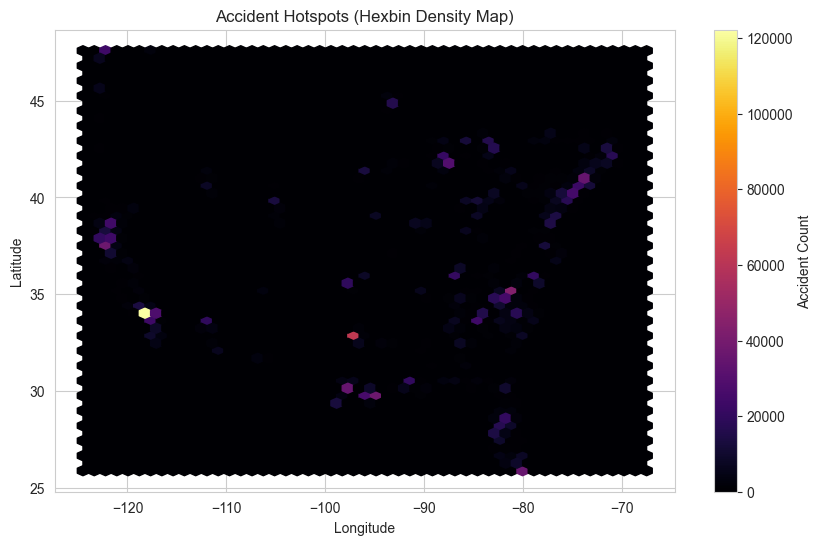

In [19]:
plt.figure(figsize=(10,6))
plt.hexbin(
    roadsafe_df['Start_Lng'],
    roadsafe_df['Start_Lat'],
    gridsize=50,
    cmap='inferno'
)
plt.colorbar(label='Accident Count')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Hotspots (Hexbin Density Map)')
plt.show()

In [21]:
top_states=roadsafe_df['State'].value_counts().head(5)
top_states

State
CA    396139
TX    214846
FL    177586
SC    126718
NY     84758
Name: count, dtype: int64

In [21]:
top_cities=roadsafe_df['City'].value_counts().head(5)
top_cities

City
Houston        68203
Dallas         48510
Los Angeles    40527
Charlotte      39905
Austin         37786
Name: count, dtype: int64

In [24]:
top5_states = top_states.index
state_df = roadsafe_df[roadsafe_df['State'].isin(top5_states)]

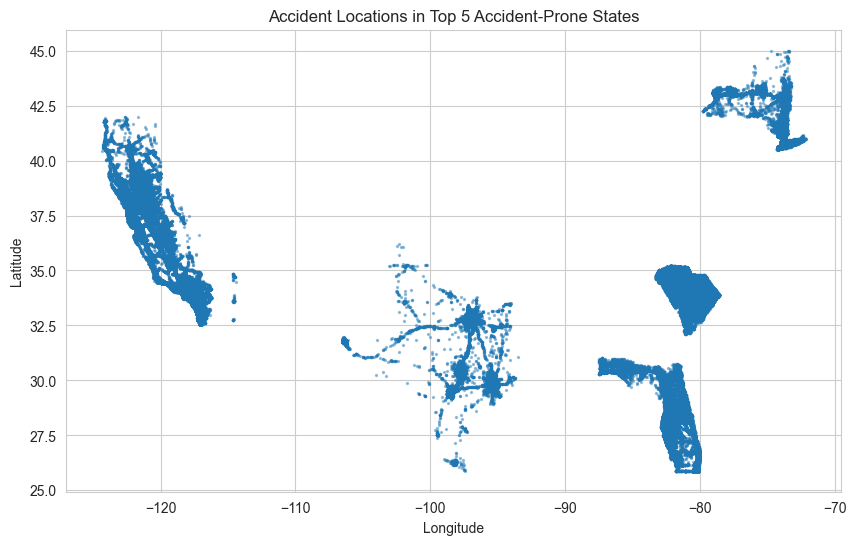

In [25]:
plt.figure(figsize=(10,6))
plt.scatter(
    state_df['Start_Lng'],
    state_df['Start_Lat'],
    s=2,
    alpha=0.4
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Locations in Top 5 Accident-Prone States')
plt.show()

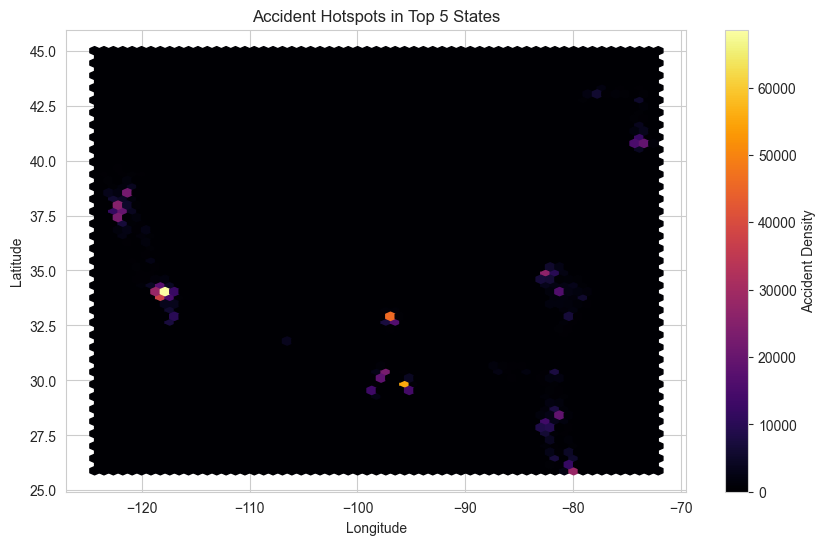

In [26]:
plt.figure(figsize=(10,6))
plt.hexbin(
    state_df['Start_Lng'],
    state_df['Start_Lat'],
    gridsize=60,
    cmap='inferno'
)
plt.colorbar(label='Accident Density')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Hotspots in Top 5 States')
plt.show()

In [22]:
top5_cities = top_cities.index
city_df = roadsafe_df[roadsafe_df['City'].isin(top5_cities)]

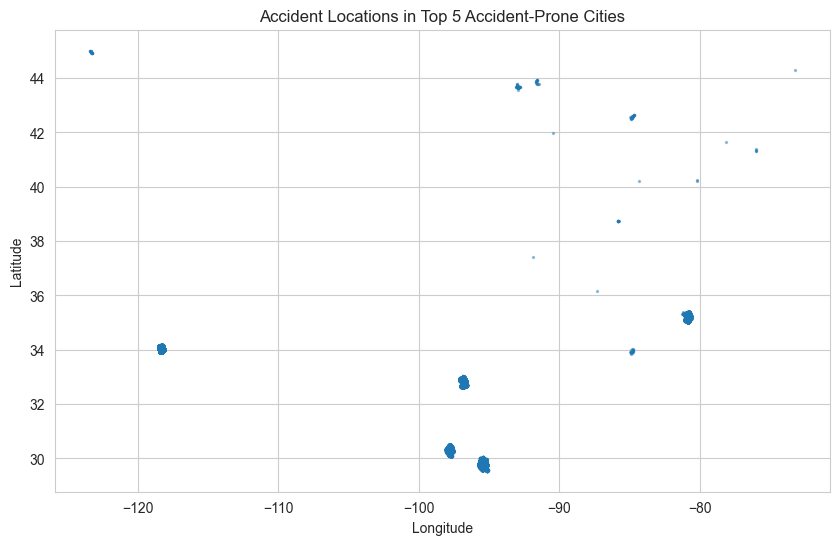

In [23]:
plt.figure(figsize=(10,6))
plt.scatter(
    city_df['Start_Lng'],
    city_df['Start_Lat'],
    s=2,
    alpha=0.4
)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Accident Locations in Top 5 Accident-Prone Cities')
plt.show()

## Step-7: Insight extraction

### What time of day has the most accidents?

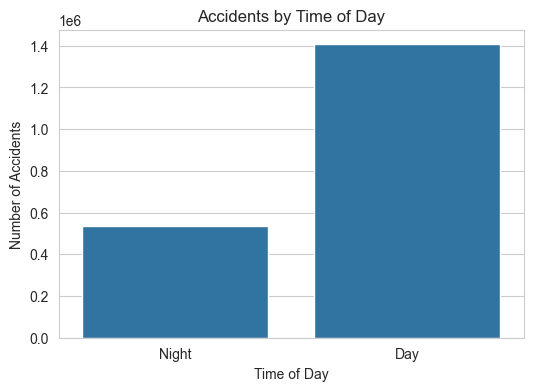

In [24]:
plt.figure(figsize=(6,4))
sns.countplot(x='TimeOfDay', data=roadsafe_df)
plt.title('Accidents by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Accidents')
plt.show()

#### Insights:-

#### 1. Most accidents occur during the Daytime, followed by Nighttime.

#### 2. Higher traffic volume and increased human activity during the day likely contribute to this trend.

#### 3. Nighttime accidents are fewer but may still be severe due to low visibility.

### Are accidents more severe during rain or fog?

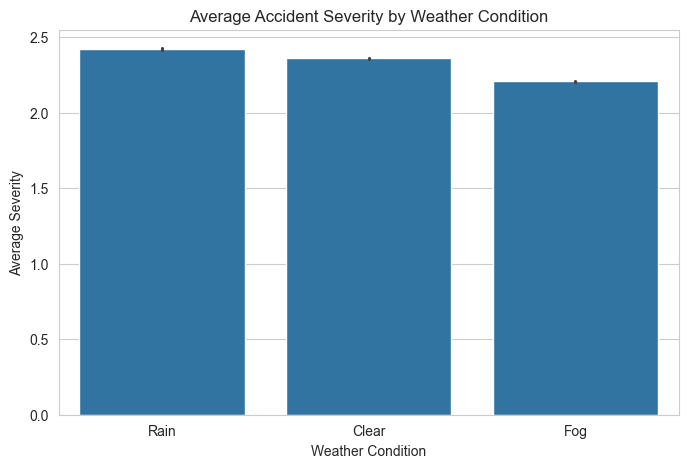

In [25]:
weather_focus = ['Rain', 'Fog', 'Clear']
filtered_weather_df = roadsafe_df[
    roadsafe_df['Weather_Condition'].isin(weather_focus)
]

plt.figure(figsize=(8,5))
sns.barplot(x='Weather_Condition', y='Severity', data=filtered_weather_df)
plt.title('Average Accident Severity by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Average Severity')
plt.show()

#### Insights:-

#### 1. Accidents during Rain and Clear weather show higher average severity compared to fog.

#### 2. Reduced visibility, slippery roads, and delayed braking increase accident impact.

### Is there a correlation between visibility and severity?

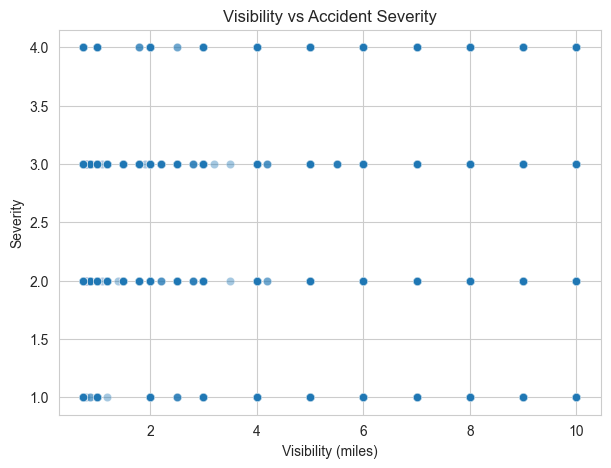

In [26]:
plt.figure(figsize=(7,5))
sns.scatterplot(x='Visibility(mi)', y='Severity', data=roadsafe_df, alpha=0.4)
plt.title('Visibility vs Accident Severity')
plt.xlabel('Visibility (miles)')
plt.ylabel('Severity')
plt.show()

#### Insights:-

#### 1. Higher severity accidents are more frequent at lower visibility levels.

#### 2. As visibility increases, severity tends to remain lower and more stable.

#### 3. This indicates a negative relationship: poor visibility increases accident severity.

## Step-8: Hypothesis testing

### Hypothesis 1: Time of Day vs Accident Frequency

#### Null Hypothesis (H₀): Accidents are evenly distributed across different times of the day.

#### Alternative Hypothesis (H₁): Accident frequency varies significantly across different times of the day.

#### Observation: Exploratory analysis shows that daytime accidents occur more frequently compared to nighttime accidents.

#### Conclusion: The null hypothesis is rejected. Accident frequency depends on the time of day, with daytime showing the highest number of accidents due to increased traffic volume and human activity.

### Hypothesis 2: Weather Condition vs Accident Severity

#### Null Hypothesis (H₀): Weather conditions (Rain, Fog, Clear) have no effect on accident severity.

#### Alternative Hypothesis (H₁): Accident severity varies under different weather conditions.

#### Observation: Accidents occurring during Rain and clear weather show higher average severity compared to fog.

#### Conclusion: The null hypothesis is rejected. Adverse weather conditions significantly increase accident severity due to poor visibility and reduced road grip.

### Hypothesis 3: Visibility vs Accident Severity

#### Null Hypothesis (H₀): There is no relationship between visibility and accident severity.

#### Alternative Hypothesis (H₁): Accident severity increases as visibility decreases.

#### Observation: Scatter plot analysis shows that higher severity accidents cluster at lower visibility levels.

#### Conclusion: The null hypothesis is rejected. There exists a negative relationship between visibility and accident severity, indicating that poor visibility is a major contributing factor.